# Star Wars Movie and Character Ratings

In [61]:
# Import data and glimpse at first few rows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv', encoding = 'ISO-8859-1')
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Data Cleaning

In [62]:
# Remove rows with a missing respondent ID

star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [63]:
# Create dictionary mapping for columns 2 and 3

yes_no = {
    "Yes": True,
    "No": False
}

# Convert variables to boolean

star_wars.iloc[:,1] = star_wars.iloc[:,1].map(yes_no)
star_wars.iloc[:,2] = star_wars.iloc[:,2].map(yes_no)

In [64]:
# Create dictionary mapping for movies respondents have seen or not (columns 4 through 9)

movie_mapping = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan: False
}
# Convert variables to boolean

for i in star_wars.columns[3:9]:
    star_wars[i] = star_wars[i].map(movie_mapping)

In [65]:
# Convert columns 10 through 15 to float data type

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [66]:
# Create dictionary mapping for likert-type scale questions (columns 16 through 29)

likert_mapping = {
'Somewhat favorably': 5,
'Very favorably': 4,
'Neither favorably nor unfavorably (neutral)': 3,
'Somewhat unfavorably': 2,
'Unfamiliar (N/A)': 0,
'Very unfavorably': 1
}

for i in star_wars.columns[15:29]:
    star_wars[i] = star_wars[i].map(likert_mapping)

In [67]:
# Rename columns

star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': "seen_Ep1",
    'Unnamed: 4': 'seen_Ep2',
    'Unnamed: 5': 'seen_Ep3',
    'Unnamed: 6': 'seen_Ep4',
    'Unnamed: 7': 'seen_Ep5',
    'Unnamed: 8': 'seen_Ep6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_Ep1',
    'Unnamed: 10': 'ranking_Ep2',
    'Unnamed: 11': 'ranking_Ep3',
    'Unnamed: 12': 'ranking_Ep4',
    'Unnamed: 13': 'ranking_Ep5',
    'Unnamed: 14': 'ranking_Ep6',
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16': 'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3P0',
    'Unnamed: 25': 'R2 D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala',
    'Unnamed: 28': 'Yoda'
})

## Data Visualization and Analysis

Text(0,0.5,'Average Ranking')

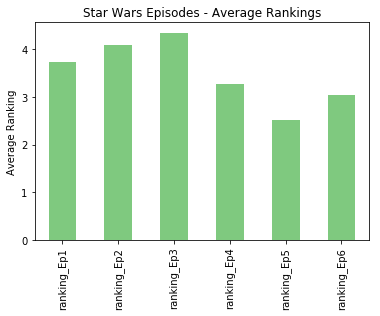

In [68]:
# Create bar chart of average episode rankings

ranking_vars = star_wars.columns[9:15]
ax = star_wars[ranking_vars].mean().plot.bar(colormap = 'Accent',
                                             title = 'Star Wars Episodes - Average Rankings')
ax.set_ylabel('Average Ranking')

**The original Star Wars trilogy (Ep4, Ep5, and Ep6) tends to have a lower ranking than the second trilogy (Ep1, Ep2, and Ep3), indicating that respondents typically prefer the original trilogy over the second trilogy. Within the original trilogy, Episode 5 was the clear favorite, followed by Episode 6 and then Episode 4.**

Text(0,0.5,'Number of Respondents')

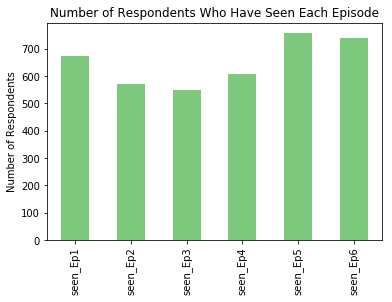

In [69]:
# Create bar chart of number of respondents who have seen each episode

seen_vars = star_wars.columns[3:9]
ax = star_wars[seen_vars].sum().plot.bar(colormap = 'Accent',
                                         title = 'Number of Respondents Who Have Seen Each Episode')
ax.set_ylabel('Number of Respondents')

**Episode 5 appears to be the most popular in terms of the number of people who have seen the film, followed closely by episode 6.**

Text(0,0.5,'Number of Respondents')

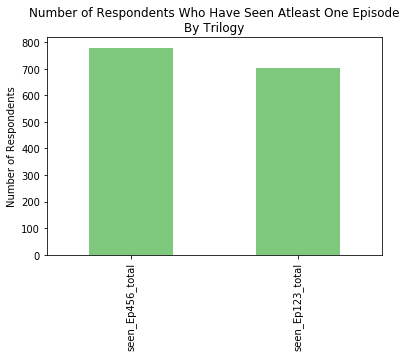

In [70]:
# Create temporary dataframe with totals for each trilogy

tmp = star_wars
tmp['seen_Ep456_total'] = tmp['seen_Ep4'] | tmp['seen_Ep5'] | tmp['seen_Ep6']
tmp['seen_Ep123_total'] = tmp['seen_Ep1'] | tmp['seen_Ep2'] | tmp['seen_Ep3']
ax = tmp[['seen_Ep456_total', 'seen_Ep123_total']].sum().plot.bar(colormap = 'Accent',
                                                                  title = "Number of Respondents Who Have Seen Atleast One Episode\nBy Trilogy")
ax.set_ylabel('Number of Respondents')

**Overall, it appears that the first trilogy (Episodes 4, 5, and 6) has been viewed more than the newer, second trilogy (Episodes 1, 2, and 3).**

Text(0,0.5,'Average Rating')

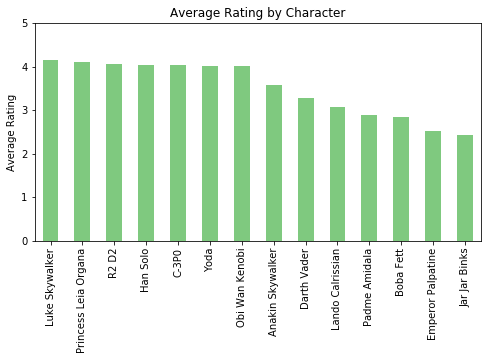

In [71]:
# Create bar chart of average charater ratings

character_vars = star_wars.columns[15:29]
character_ranking = star_wars[character_vars].mean().sort_values(ascending = False)
ax = character_ranking.plot.bar(colormap = 'Accent',
                                title = 'Average Rating by Character',
                                figsize = (8,4),
                                ylim = (0,5))
ax.set_ylabel('Average Rating')

**Not surprisingly, Luke Skywalker is rated as the most favorable character. Even less surprising is that Jar Jar Binks is the least favorable character in the Star Wars series.**

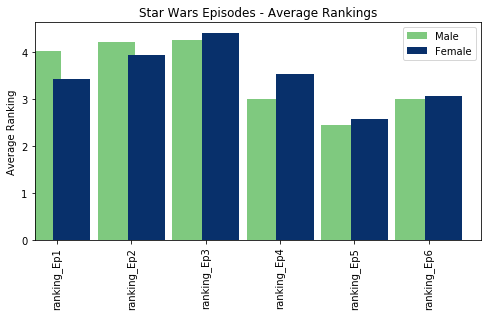

In [72]:
# Compare Male and Female Ratings via a dodged bar chart

male = star_wars[star_wars['Gender'] == 'Male']
female = star_wars[star_wars['Gender'] == 'Female']

ax = male[ranking_vars].mean().plot.bar(colormap = 'Accent',
                                        title = 'Star Wars Episodes - Average Rankings',
                                        position = 0.9,
                                        legend = True,
                                        figsize = (8,4))

female[ranking_vars].mean().plot.bar(colormap = 'Blues_r',
                                     position = 0.1,
                                     legend = True)

ax.set_ylabel('Average Ranking')
ax.legend(['Male', 'Female'])

**Both men and women appear to prefer the first trilogy over the second trilogy. Between men and women, the survey suggests that men tend to give movies from the first trilogy slightly better average ratings than women. Women, on the other hand, tend to give movies from the second trilogy slightly better ratings than men, except for episode 3.**

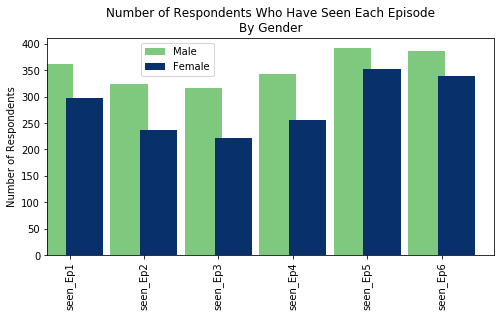

In [73]:
ax = male[seen_vars].sum().plot.bar(colormap = 'Accent',
                                    title = 'Number of Respondents Who Have Seen Each Episode\nBy Gender',
                                    position = 0.9,
                                    legend = True,
                                    figsize = (8,4))

female[seen_vars].sum().plot.bar(colormap = 'Blues_r',
                                 position = 0.1,
                                 legend = True)

ax.set_ylabel('Number of Respondents')
ax.legend(['Male', 'Female'])
ax.get_legend().set_bbox_to_anchor((0.2, 1))

**The data suggest that men are more likely to have seen any of the 6 episodes from the first two Star Wars Trilogies, when compared with women.**

In [74]:
# Factor summaries for select columns

cols = [1,2,29,30,31,32,33,34,35,36,37]
for i in star_wars.columns[cols]:
    print(star_wars[i].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64
No     615
Yes    213
Name: Are you familiar with the Expanded Universe?, dtype: int64
No     114
Yes     99
Name: Do you consider yourself to be a fan of the Expanded Universe?æ, dtype: int64
No     641
Yes    427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64
Female    549
Male      497
Name: Gender, dtype: int64
45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64
$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64
Some 

In [75]:
# Generate count of missing values for each column

for i in range(1,38):
    print(star_wars.columns[i])
    print(sum(pd.isnull(star_wars.iloc[:,i])))

Have you seen any of the 6 films in the Star Wars franchise?
0
Do you consider yourself to be a fan of the Star Wars film franchise?
350
seen_Ep1
0
seen_Ep2
0
seen_Ep3
0
seen_Ep4
0
seen_Ep5
0
seen_Ep6
0
ranking_Ep1
351
ranking_Ep2
350
ranking_Ep3
351
ranking_Ep4
350
ranking_Ep5
350
ranking_Ep6
350
Han Solo
357
Luke Skywalker
355
Princess Leia Organa
355
Anakin Skywalker
363
Obi Wan Kenobi
361
Emperor Palpatine
372
Darth Vader
360
Lando Calrissian
366
Boba Fett
374
C-3P0
359
R2 D2
356
Jar Jar Binks
365
Padme Amidala
372
Yoda
360
Which character shot first?
358
Are you familiar with the Expanded Universe?
358
Do you consider yourself to be a fan of the Expanded Universe?æ
973
Do you consider yourself to be a fan of the Star Trek franchise?
118
Gender
140
Age
140
Household Income
328
Education
150
Location (Census Region)
143
